<a href="https://colab.research.google.com/github/Wellsantigo/Wellington-Santiago/blob/main/Desafio_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contexto - Introdução**

Uma empresa está investindo mensalmente em plataformas de publicidade online,
como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas
interessadas em seus produtos). A fim de acompanhar o desempenho desses
investimentos, a empresa registra todos os gastos com publicidade e todos os retornos
de vendas gerados a partir desses investimentos.
Para entender melhor a relação entre as variáveis presentes nesses registros e
identificar os fatores que mais impactam na geração de leads, a empresa solicitou a
análise de um especialista em dados. Além disso, a empresa busca criar um
modelo de predição de valores para estimar o retorno de vendas que pode ser gerado
a partir de um determinado investimento em publicidade.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plb
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
plb.style.use('seaborn')
plb.rc('axes', titlesize=10)


leads = pd.read_csv('/content/MKT.csv', sep=',')
leads.head()

<ipython-input-8-7bfa03c45663>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plb.style.use('seaborn')


,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
leads.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
leads.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<ipython-input-19-458fbc90f95b>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plb.subplot(131)


Text(0.5, 0, 'Patrocínio')

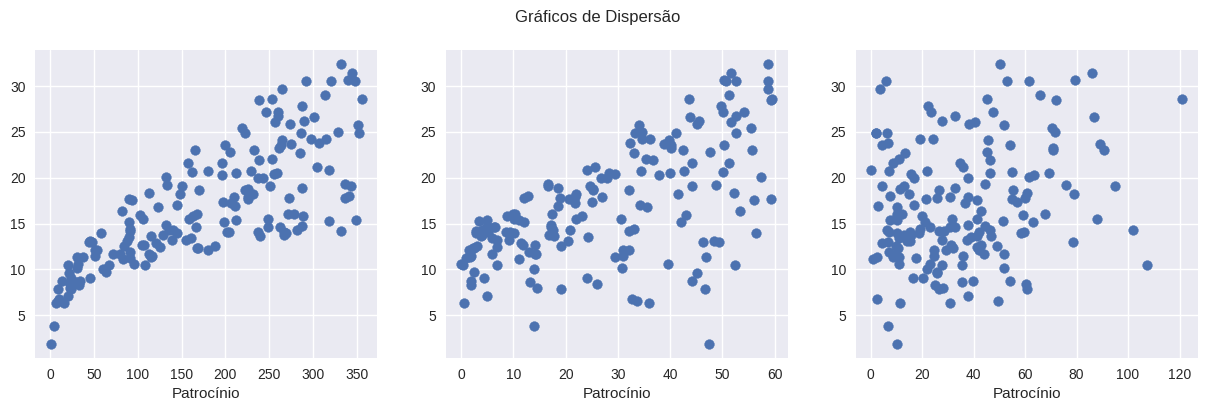

In [ ]:
X = np.array(leads["youtube"]).reshape((-1,1))
Y = np.array(leads["sales"])

plb.figure(figsize=(15, 4))
plb.suptitle("Gráficos de Dispersão")
plb.ylabel("Patrocínio")

plb.subplot(131)
plb.scatter(leads["youtube"],Y)
plb.xlabel("Patrocínio")
plb.subplot(132)
plb.scatter(leads["facebook"],Y)
plb.xlabel("Patrocínio")
plb.subplot(133)
plb.scatter(leads["newspaper"],Y)
plb.xlabel("Patrocínio")

In [ ]:
modelo = sm.OLS(Y, sm.add_constant(X)).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           1.55e-36
Time:                        15:22:42   Log-Likelihood:                -476.41
No. Observations:                 171   AIC:                             956.8
Df Residuals:                     169   BIC:                             963.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3419      0.606     13.754      0.0

Text(0, 0.5, 'Receita (Mil Milhões de Reais)')

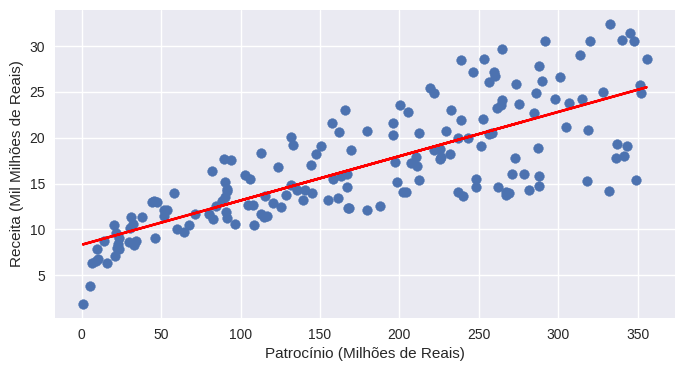

In [ ]:
plb.figure(figsize=(8, 4))
plb.scatter(X,Y)
plb.plot(X, modelo.predict(), color="r")
plb.xlabel("Patrocínio (Milhões de Reais)")
plb.ylabel("Receita (Mil Milhões de Reais)")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_teste, = train_test_split(X, Y, train_size= 0.7, test_size= 0.3, random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_teste.shape)

(119, 1)
(52, 1)
(119,)
(52,)


In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [ ]:
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(Y_teste, y_pred)

In [ ]:
print('r_quadrado', r)

r_quadrado 0.5927249074329877


Text(0, 0.5, 'Patrocínio')

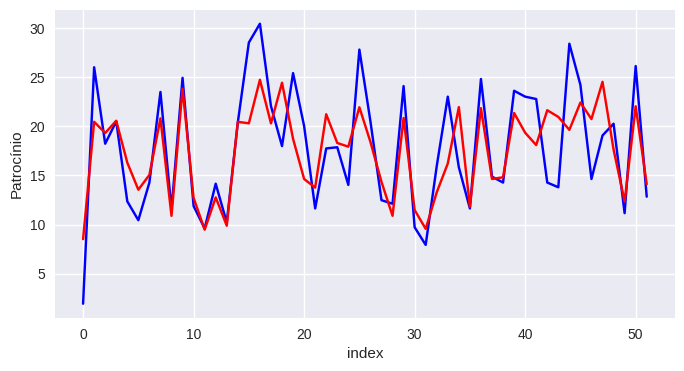

In [ ]:
import matplotlib.pyplot  as plt

c = [i for i in range(52)]
fig = plt.figure(figsize=(8, 4))
plt.plot(c, Y_teste, color='blue')
plt.plot(c, y_pred, color='red')
plt.xlabel('index')
plt.ylabel('Patrocínio')
